In [1]:
import process
import importlib as imp

In [2]:
import numpy as np
import sounddevice as sd

In [3]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (Logitech BRIO), MME (2 in, 0 out)
   2 Microphone (3- Realtek(R) Audio, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speakers (3- Realtek(R) Audio), MME (0 in, 8 out)
   5 Realtek Digital Output (3- Real, MME (0 in, 2 out)
   6 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   7 Microphone (Logitech BRIO), Windows DirectSound (2 in, 0 out)
   8 Microphone (3- Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  10 Speakers (3- Realtek(R) Audio), Windows DirectSound (0 in, 8 out)
  11 Realtek Digital Output (3- Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 ASIO4ALL v2, ASIO (2 in, 8 out)
  13 Realtek Digital Output (3- Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  14 Speakers (3- Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  15 Microphone (3- Realtek(R) Audio), Windows WASAPI (2 in, 0

In [40]:
data=process.time_rec('meme',10)

listo


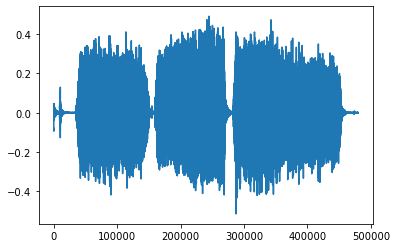

In [41]:
import matplotlib.pyplot as plt
plt.plot(data)

In [42]:
spec = process.spectrogram(data[:,0],8192,8000)

(4097, 2458)


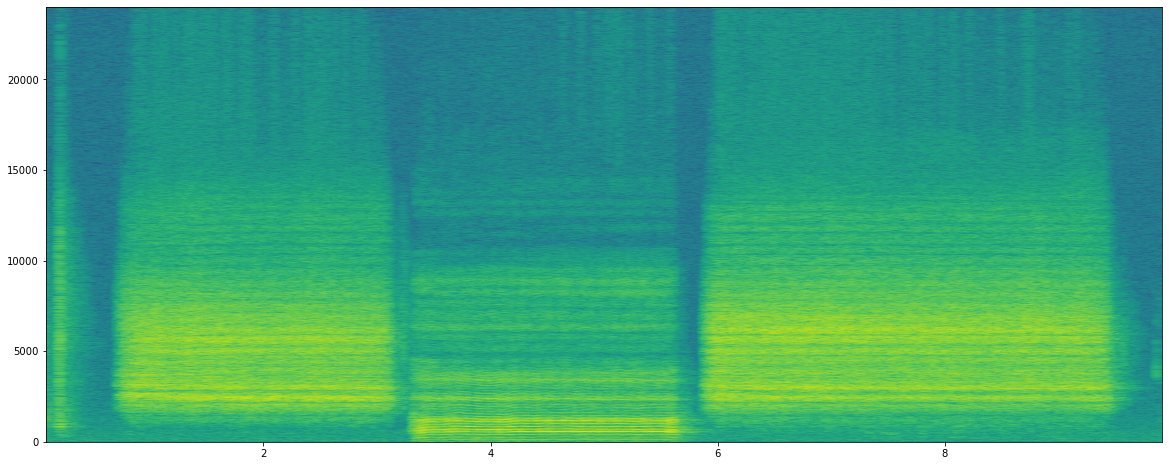

In [43]:
plt.figure(figsize=(20,8))
plt.pcolormesh(spec['t'],spec['f'],20*np.log10(spec['s'][0]),shading='gouraud');

In [17]:
imp.reload(process)
spec = process.spectrogram(data[:,0],8192,8000,logf=True)

(4097, 2458)


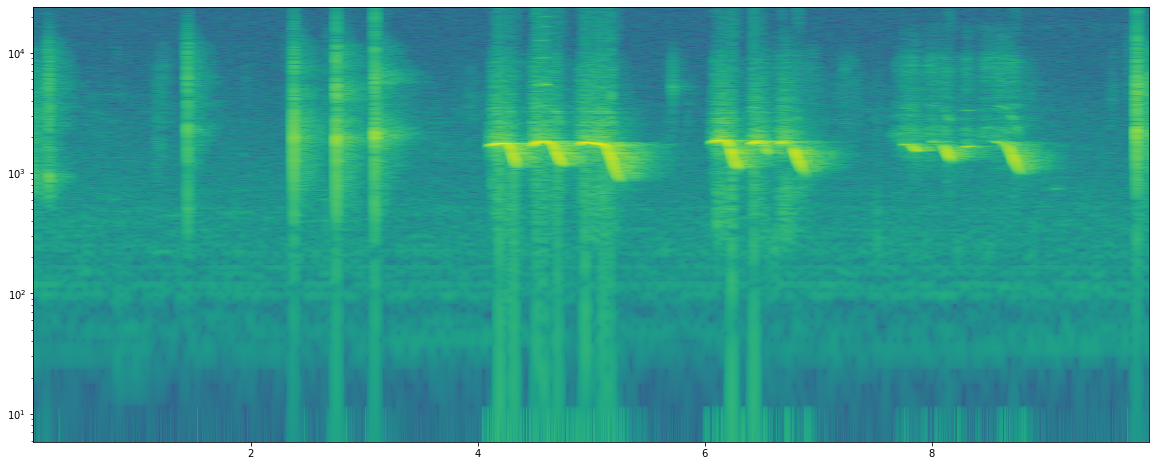

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.pcolormesh(spec['t'],spec['f'],20*np.log10(spec['s'][0]),shading='auto')
ax.set_yscale('log')

In [44]:
spec = process.spectrogram(data,1024,0)

(513, 468)


In [47]:
import soundscape
ts, aci = soundscape.acoustic_complexity(spec,5)

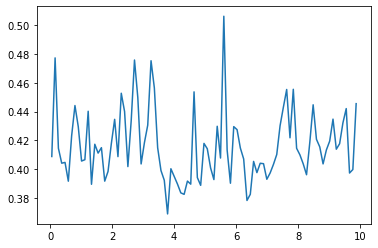

In [49]:
plt.plot(ts,aci[0,:]/1024)

In [51]:
imp.reload(soundscape)
ts, ndsi = soundscape.ndsi(spec,5)

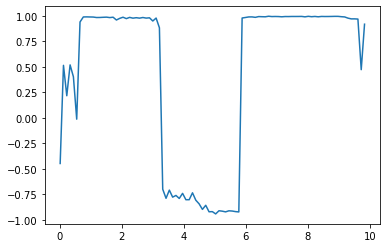

In [52]:
plt.plot(ts,ndsi[0,:])

In [53]:
imp.reload(soundscape)
ts, BI = soundscape.bioacoustic_index(spec,10)

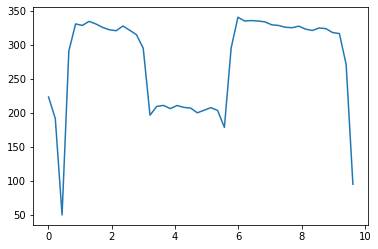

In [54]:
plt.plot(ts,BI[0,:])

In [55]:
BI.shape

(1, 46)

In [57]:
10*16*3600*24

13824000